In [390]:
import pandas as pd
import openpyxl 
from datetime import datetime 
from scipy.stats import kurtosis
import numpy as np 
import pylab as p
import os
from pathlib import Path
from openpyxl import load_workbook

In [391]:
#get the sorted fin file
# file_name_str = r"..\Sray\fin concate esg\AU_bloom_fin_esg.xlsx";
# file_name_str = r"..\Sray\fin concate esg\CN_bloom_fin_esg.xlsx";
# file_name_str = r"..\Sray\fin concate esg\HK_bloom_fin_esg.xlsx";
# file_name_str = r"..\Sray\fin concate esg\MY_bloom_fin_esg.xlsx";
file_name_str = r"..\Sray\fin concate esg\SG_bloom_fin_esg.xlsx";
file_name = Path(file_name_str).stem
fin_file = pd.ExcelFile(file_name_str)

findata_sheet = pd.read_excel(fin_file, sheet_name="fin_esg", index_col=0, header=0)

fin_data = pd.DataFrame(findata_sheet)

fin_data.head() 


,Year,Dates,Tkr & Exch,Name,Sec_no,PX_LAST,HISTORICAL_MARKET_CAP,TRAIL_12M_SALES_PER_SH,IS_EPS,CF_FREE_CASH_FLOW,PE_RATIO,RETURN_COM_EQY,RETURN_ON_ASSET,VOLATILITY_180D,VOLATILITY_360D,BETA_RAW_OVERRIDABLE,esg,g,s,e
firm no,,,,,,,,,,,,,,,,,,,,
1,2017,2017-12-31,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,27.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.532,15.649,0.3789,33.075142,83.594223,13.724305,1.721534
1,2017,2017-12-29,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,26.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.715,14.131,0.3959,33.075142,83.594223,13.724305,1.721534
1,2018,2018-12-31,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,26.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.522,16.718,0.7217,35.700634,83.594223,16.505442,6.825732
1,2019,2019-12-31,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,21.68,10294.6898,39.3150,1.0408,3678.7,10.2225,NaN,NaN,9.237,11.053,0.3144,35.851524,83.594223,16.958887,6.825732
1,2020,2020-12-31,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,20.96,9466.3814,45.3489,1.3300,2645.5,10.3251,10.6901,0.9444,14.474,17.307,0.6655,42.530933,83.594223,18.561064,25.279371


In [392]:
print (fin_data.columns)

Index(['Year', 'Dates', 'Tkr & Exch', 'Name', 'Sec_no', 'PX_LAST',
       'HISTORICAL_MARKET_CAP', 'TRAIL_12M_SALES_PER_SH', 'IS_EPS',
       'CF_FREE_CASH_FLOW', 'PE_RATIO', 'RETURN_COM_EQY', 'RETURN_ON_ASSET',
       'VOLATILITY_180D', 'VOLATILITY_360D', 'BETA_RAW_OVERRIDABLE', 'esg',
       'g', 's', 'e'],
      dtype='object')


In [393]:
fin_data ['es'] = fin_data['e'] * fin_data['s']
fin_data ['eg'] = fin_data['e'] * fin_data['g']
fin_data ['sg'] = fin_data['s'] * fin_data['g']
fin_data['esg_cubic'] = fin_data['esg']**3

In [394]:
fin_data = fin_data.rename({'Name': 'firm_name',
                            'Tkr & Exch': 'tkr',
                            'Sec_no': 'sec_no',
                            'Dates': 'date',
                            'Year':'Year'.lower(),
                            'PE_RATIO': 'pe',
                            'BETA_RAW_OVERRIDABLE': 'beta',
                            'CF_FREE_CASH_FLOW': 'fcf',
                            'RETURN_ON_ASSET': 'roa',
                            'PX_LAST': 'px', 
                            'HISTORICAL_MARKET_CAP': 'HISTORICAL_MARKET_CAP'.lower(), 
                            'TRAIL_12M_SALES_PER_SH': 'TRAIL_12M_SALES_PER_SH'.lower(), 
                            'IS_EPS': 'IS_EPS'.lower(),
                            'RETURN_COM_EQY': 'RETURN_COM_EQY'.lower(),
                            'VOLATILITY_360D':'VOLATILITY_360D'.lower()}, axis=1)
fin_data.head()

,year,date,tkr,firm_name,sec_no,px,historical_market_cap,trail_12m_sales_per_sh,is_eps,fcf,...,volatility_360d,beta,esg,g,s,e,es,eg,sg,esg_cubic
firm no,,,,,,,,,,,,,,,,,,,,,
1,2017,2017-12-31,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,27.67,NaN,NaN,NaN,NaN,...,15.649,0.3789,33.075142,83.594223,13.724305,1.721534,23.626858,143.910298,1147.272626,36183.048018
1,2017,2017-12-29,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,26.76,NaN,NaN,NaN,NaN,...,14.131,0.3959,33.075142,83.594223,13.724305,1.721534,23.626858,143.910298,1147.272626,36183.048018
1,2018,2018-12-31,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,26.15,NaN,NaN,NaN,NaN,...,16.718,0.7217,35.700634,83.594223,16.505442,6.825732,112.661725,570.591782,1379.759572,45501.717133
1,2019,2019-12-31,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,21.68,10294.6898,39.3150,1.0408,3678.7,...,11.053,0.3144,35.851524,83.594223,16.958887,6.825732,115.756822,570.591782,1417.664990,46081.104273
1,2020,2020-12-31,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,20.96,9466.3814,45.3489,1.3300,2645.5,...,17.307,0.6655,42.530933,83.594223,18.561064,25.279371,469.212022,2113.209399,1551.597704,76933.367285


In [395]:
fin_data['date'] = fin_data['date'].astype('datetime64')
fin_data.dtypes

year                               int64
date                      datetime64[ns]
tkr                               object
firm_name                         object
sec_no                           float64
px                               float64
historical_market_cap            float64
trail_12m_sales_per_sh           float64
is_eps                           float64
fcf                              float64
pe                               float64
return_com_eqy                   float64
roa                              float64
VOLATILITY_180D                  float64
volatility_360d                  float64
beta                             float64
esg                              float64
g                                float64
s                                float64
e                                float64
es                               float64
eg                               float64
sg                               float64
esg_cubic                        float64
dtype: object

In [396]:
sectors = []
sectors = (fin_data['sec_no'].drop_duplicates()).to_list()
print(sectors)
len(sectors)

[7.0, 11.0, 8.0, 9.0, 6.0, 3.0, 5.0, 2.0, 10.0, 1.0, 4.0, nan]


12

In [397]:
#initial_year=2017
#stop_year=2020
#start_date = '01-'+ str(initial_year) 
#end_date = '12-'+ str(initial_year) 
#print(start_date)
#print(end_date)
    

#temp_dataframe = fin_data.loc[(fin_data['sec_no']==1) & (fin_data['date']>=start_date) & (fin_data['date']<=end_date)].copy()
#temp_dataframe

## **Add new indicators** 

In [398]:
# companies_sec = []
# initial_year = 2017
# stop_year = 2023

# for year in range(initial_year, stop_year+1, 1):

#     start_date = '01-' + str(year)
#     if (year < 2021):
#         end_date = '12-' + str(year)
#     elif (year == 2021):
#         end_date = '02-' + str(year)

#     for month in range(1, 13):
#         m = str(month)
#         if (month < 10):
#             start_date = '0' + m + '-' + str(year)
#         else:
#             start_date = m + '-' + str(year)

#         for k in range(len(sectors)):

#             # temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['date']>=start_date) & (fin_data['date']<=end_date)].copy()
#             temp_dataframe = fin_data.loc[(
#                 fin_data['sec_no'] == k+1) & (fin_data['date'] == start_date)].copy()
#         print(temp_dataframe)


In [399]:
#seperate each of the companies and store into list companies_financial=[]

# temp_dataframe2 = temp_dataframe.loc[fin_data['date']== (str(m)+ '-' + str(year)) ].copy()

#initialize counter to track the number of company
companies_sec=[]
initial_year=2017
stop_year=2023

for year in range(initial_year,stop_year+1,1):    

    # start_date = '01-'+ str(year) 
    # if (year <2021):
    #     end_date = '12-'+ str(year) 
    # elif (year==2021):    
    #     end_date = '02-'+ str(year) 

    # for month in range (1,13):
    #     m=str(month)
    #     if (month<10):
    #         start_date = '0'+ m + '-' + str(year) 
    #     else:
    #         start_date = m + '-' + str(year)  

    
        for k in range (len(sectors)):
        
            # temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['date']>=start_date) & (fin_data['date']<=end_date)].copy()
            temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['year']>=initial_year& (fin_data['year']<=stop_year))].copy()
            # temp_dataframe = fin_data.copy()

            
            # temp_dataframe['ep_sec_mean']= temp_dataframe['ep'].mean()

            # temp_dataframe['ep_sec_sd']= temp_dataframe['ep'].std()

            # temp_dataframe['sp_sec_mean'] = temp_dataframe['sp'].mean()

            # temp_dataframe['sp_sec_sd'] = temp_dataframe['sp'].std()

            # temp_dataframe['cfp_sec_mean'] = temp_dataframe['cfp'].mean()

            # temp_dataframe['cfp_sec_sd'] = temp_dataframe['cfp'].std()

            temp_dataframe['roa_sec_mean'] = temp_dataframe['roa'].mean()

            temp_dataframe['roa_sec_sd'] = temp_dataframe['roa'].std()

            companies_sec.append(temp_dataframe)



In [400]:
#combine all the data 
new_companies_data = pd.concat(companies_sec)
new_companies_data

,year,date,tkr,firm_name,sec_no,px,historical_market_cap,trail_12m_sales_per_sh,is_eps,fcf,...,esg,g,s,e,es,eg,sg,esg_cubic,roa_sec_mean,roa_sec_sd
firm no,,,,,,,,,,,,,,,,,,,,,
41,2017,2017-12-31,MMT SP Equity,MERMAID MARITIME PCL,1.0,0.142,153.1304,0.0892,-0.0044,11.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.172700,11.028948
41,2017,2017-12-29,MMT SP Equity,MERMAID MARITIME PCL,1.0,0.142,135.3480,0.1024,0.0013,2.160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.172700,11.028948
41,2018,2018-12-31,MMT SP Equity,MERMAID MARITIME PCL,1.0,0.091,90.2125,0.0670,-0.0081,8.019,...,42.571171,81.095726,18.833132,27.635157,520.456547,2241.093091,1527.286496,77151.927994,-7.172700,11.028948
41,2019,2019-12-31,MMT SP Equity,MERMAID MARITIME PCL,1.0,0.095,141.9005,0.0750,-0.0053,2.846,...,42.299568,81.095726,20.405079,25.249168,515.211273,2047.599642,1654.764687,75684.649050,-7.172700,11.028948
41,2020,2020-12-31,MMT SP Equity,MERMAID MARITIME PCL,1.0,0.071,71.6666,0.0595,-0.0042,-9.574,...,45.307312,87.357018,21.039904,27.363335,575.721924,2390.379305,1837.983231,93004.698985,-7.172700,11.028948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2019,2019-12-31,CLI SP Equity,CAPITALAND INVESTMENT LTD/SI,11.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.149894,4.284643
105,2020,2020-12-31,CLI SP Equity,CAPITALAND INVESTMENT LTD/SI,11.0,NaN,NaN,0.7063,-0.2430,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.149894,4.284643
105,2021,2021-12-31,CLI SP Equity,CAPITALAND INVESTMENT LTD/SI,11.0,3.450,17531.4920,0.8201,0.1530,-330.104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.149894,4.284643


In [401]:
new_companies_data.columns

Index(['year', 'date', 'tkr', 'firm_name', 'sec_no', 'px',
       'historical_market_cap', 'trail_12m_sales_per_sh', 'is_eps', 'fcf',
       'pe', 'return_com_eqy', 'roa', 'VOLATILITY_180D', 'volatility_360d',
       'beta', 'esg', 'g', 's', 'e', 'es', 'eg', 'sg', 'esg_cubic',
       'roa_sec_mean', 'roa_sec_sd'],
      dtype='object')

In [402]:
# try:
#     new_companies_data['ep_z'] = new_companies_data.apply(
#         lambda row: (row.ep - row.ep_sec_mean)/row.ep_sec_sd, axis=1)
# except ZeroDivisionError:
#     new_companies_data['ep_z'] = np.nan

# try:
#     new_companies_data['sp_z'] = new_companies_data.apply(
#         lambda row: (row.sp - row.sp_sec_mean)/row.sp_sec_sd, axis=1)
# except ZeroDivisionError:
#     new_companies_data['sp_z'] = np.nan

# try:
#     new_companies_data['cfp_z'] = new_companies_data.apply(
#         lambda row: (row.cfp - row.cfp_sec_mean)/row.cfp_sec_sd, axis=1)
# except ZeroDivisionError:
#     new_companies_data['cfp_z'] = np.nan


#read the column FROM ep_z to cfp_z
# col = new_companies_data.loc[:, "ep_z":"cfp_z"]
# new_companies_data['value'] = col.mean(axis=1)

try:
    new_companies_data['roa_z'] = new_companies_data.apply(
        lambda row: (row.roa - row.roa_sec_mean)/row.roa_sec_sd, axis=1)
except ZeroDivisionError:
    new_companies_data['roa_z'] = np.nan

# try:
#     new_companies_data['esg_value'] = new_companies_data.apply(
#         lambda row: (row.esg_sray + row.value)/2, axis=1)
# except ZeroDivisionError:
#     new_companies_data['esg_value'] = np.nan


In [403]:
new_companies_data.columns

Index(['year', 'date', 'tkr', 'firm_name', 'sec_no', 'px',
       'historical_market_cap', 'trail_12m_sales_per_sh', 'is_eps', 'fcf',
       'pe', 'return_com_eqy', 'roa', 'VOLATILITY_180D', 'volatility_360d',
       'beta', 'esg', 'g', 's', 'e', 'es', 'eg', 'sg', 'esg_cubic',
       'roa_sec_mean', 'roa_sec_sd', 'roa_z'],
      dtype='object')

In [404]:

#sorting the company
new_companies_data['date'] = pd.to_datetime(
    new_companies_data['date'], format='%m%Y', errors='coerce').dt.to_period('m')

new_companies_data = new_companies_data.sort_values(
    by=["sec_no", "firm_name", "date"])

#arrange according to the Portfolio-no normalization
new_companies_data = new_companies_data[['firm_name', 'tkr', 'sec_no', 'year',
                                            'date', 'esg', 'g', 's', 'e', 'es', 'eg', 'sg', 'esg_cubic', 
                                            'px','historical_market_cap', 'trail_12m_sales_per_sh', 
                                            'is_eps', 'fcf','pe', 'return_com_eqy', 'roa', 'VOLATILITY_180D', 
                                            'volatility_360d','beta']]

new_companies_data


,firm_name,tkr,sec_no,year,date,esg,g,s,e,es,...,historical_market_cap,trail_12m_sales_per_sh,is_eps,fcf,pe,return_com_eqy,roa,VOLATILITY_180D,volatility_360d,beta
firm no,,,,,,,,,,,,,,,,,,,,,
59,EZRA HOLDINGS LTD,EZRA SP Equity,1.0,2017,2017-12,27.190422,80.523781,0.846433,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.798,107.236,2.8931
59,EZRA HOLDINGS LTD,EZRA SP Equity,1.0,2017,2017-12,27.190422,80.523781,0.846433,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.798,103.720,2.8931
59,EZRA HOLDINGS LTD,EZRA SP Equity,1.0,2017,2017-12,27.190422,80.523781,0.846433,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.798,107.236,2.8931
59,EZRA HOLDINGS LTD,EZRA SP Equity,1.0,2017,2017-12,27.190422,80.523781,0.846433,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.798,103.720,2.8931
59,EZRA HOLDINGS LTD,EZRA SP Equity,1.0,2017,2017-12,27.190422,80.523781,0.846433,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.798,107.236,2.8931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,YOMA STRATEGIC HLDGS LTD,YOMA SP Equity,11.0,2023,2023-01,NaN,NaN,NaN,NaN,NaN,...,155.8669,0.0351,-0.0039,10.228,NaN,-4.8704,-1.9618,44.341,39.173,0.7060
16,YOMA STRATEGIC HLDGS LTD,YOMA SP Equity,11.0,2023,2023-01,NaN,NaN,NaN,NaN,NaN,...,155.8669,0.0351,-0.0039,10.228,NaN,-4.8704,-1.9618,44.341,39.173,0.7060
16,YOMA STRATEGIC HLDGS LTD,YOMA SP Equity,11.0,2023,2023-01,NaN,NaN,NaN,NaN,NaN,...,155.8669,0.0351,-0.0039,10.228,NaN,-4.8704,-1.9618,44.341,39.173,0.7060


In [405]:
# new_companies_data.to_excel("SG_Bloomberg_fin_data_portfolio.xlsx", sheet_name="main")
describe_df_path = ""

if file_name[:2].lower() == 'AU'.lower():
    new_companies_data.to_excel( "..\Sray\Analysis\\" + file_name[:2] + "\\" + file_name[:2] +"_Bloomberg_fin_data_portfolio.xlsx", sheet_name="main")
    describe_df_path = "..\Sray\Analysis\\" + file_name[:2] + "\\" + file_name[:2] +"_Descriptive Statistics.xlsx"

elif file_name[:2].lower() == 'CN'.lower():
    new_companies_data.to_excel( "..\Sray\Analysis\\" + file_name[:2] + "\\" + file_name[:2] +"_Bloomberg_fin_data_portfolio.xlsx", sheet_name="main")
    describe_df_path = "..\Sray\Analysis\\" + file_name[:2] + "\\" + file_name[:2] +"_Descriptive Statistics.xlsx"

elif file_name[:2].lower() == 'HK'.lower():
    new_companies_data.to_excel( "..\Sray\Analysis\\" + file_name[:2] + "\\" + file_name[:2] +"_Bloomberg_fin_data_portfolio.xlsx", sheet_name="main")
    describe_df_path = "..\Sray\Analysis\\" + file_name[:2] + "\\" + file_name[:2] +"_Descriptive Statistics.xlsx"

elif file_name[:2].lower() == 'MY'.lower():
    new_companies_data.to_excel( "..\Sray\Analysis\\" + file_name[:2] + "\\" + file_name[:2] +"_Bloomberg_fin_data_portfolio.xlsx", sheet_name="main")
    describe_df_path = "..\Sray\Analysis\\" + file_name[:2] + "\\" + file_name[:2] +"_Descriptive Statistics.xlsx"

elif file_name[:2].lower() == 'SG'.lower():
    new_companies_data.to_excel( "..\Sray\Analysis\\" + file_name[:2] + "\\" + file_name[:2] +"_Bloomberg_fin_data_portfolio.xlsx", sheet_name="main")
    describe_df_path = "..\Sray\Analysis\\" + file_name[:2] + "\\" + file_name[:2] +"_Descriptive Statistics.xlsx"


## **Descriptive Section**

In [406]:
#Descriptive statistics for e, s, g, esg, ret, value_z, roa_z, vol_90d, vol_180d
describe_df= new_companies_data.describe(include="all")
print(describe_df)

describe_df.to_excel( describe_df_path, sheet_name="main")


                firm_name             tkr       sec_no         year     date  \
count                5880            5880  5880.000000  5880.000000     5880   
unique                105             105          NaN          NaN        7   
top     EZRA HOLDINGS LTD  EZRA SP Equity          NaN          NaN  2017-12   
freq                   56              56          NaN          NaN     1470   
mean                  NaN             NaN     8.028571  2019.625000      NaN   
std                   NaN             NaN     3.404648     2.117814      NaN   
min                   NaN             NaN     1.000000  2017.000000      NaN   
25%                   NaN             NaN     5.000000  2017.750000      NaN   
50%                   NaN             NaN    10.000000  2019.500000      NaN   
75%                   NaN             NaN    11.000000  2021.250000      NaN   
max                   NaN             NaN    11.000000  2023.000000      NaN   

                esg            g       

## **Total number of companies in each sector**

In [407]:
df_sec_company_count = pd.DataFrame(new_companies_data.groupby(['year','sec_no' ])['tkr'].nunique())
df_sec_company_count.head()

tkr
year sec_no     
2017 1.0       2
     2.0       3
     3.0      14
     4.0       3
     5.0      13

In [408]:
book = load_workbook(describe_df_path)
writer = pd.ExcelWriter(describe_df_path, engine = 'openpyxl')
writer.book = book
df_sec_company_count.to_excel(writer, sheet_name='sec_no_count')
writer.close()

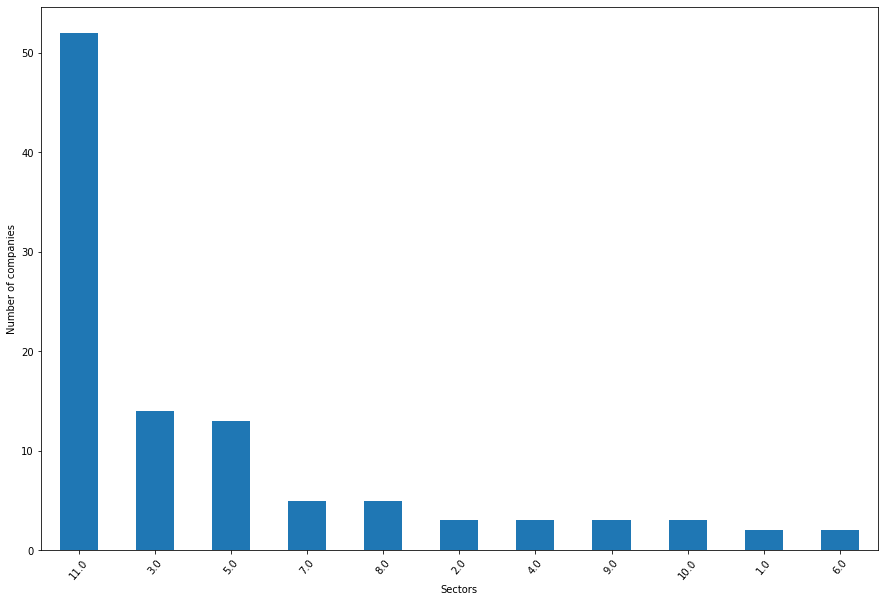

In [409]:
from matplotlib import pyplot as plt
sec_no= new_companies_data.groupby('sec_no')['tkr'].nunique()
plt.figure(figsize=(15,10))
sec_no.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Sectors")
plt.ylabel("Number of companies")
plt.show()

## **Kurtosis**

In [410]:
# new_companies_data.drop(['date', 'firm_name','tkr','sec_no' ], axis=1, inplace=True)

In [411]:
new_companies_data['px'] = new_companies_data['px'] .astype(float)
new_companies_data.dtypes

firm_name                    object
tkr                          object
sec_no                      float64
year                          int64
date                      period[M]
esg                         float64
g                           float64
s                           float64
e                           float64
es                          float64
eg                          float64
sg                          float64
esg_cubic                   float64
px                          float64
historical_market_cap       float64
trail_12m_sales_per_sh      float64
is_eps                      float64
fcf                         float64
pe                          float64
return_com_eqy              float64
roa                         float64
VOLATILITY_180D             float64
volatility_360d             float64
beta                        float64
dtype: object

In [412]:
# kurtosis(new_companies_data, fisher = True)

In [413]:
kurt = pd.DataFrame(new_companies_data.kurtosis())
kurt = kurt.reset_index()
kurt = kurt.rename({0:"kurtosis", "index": "variable"}, axis=1)
kurt.loc[len(kurt.index)] = ['kurtosis_mean', new_companies_data.kurtosis().mean()]
kurt

C:\Users\IBIZMY\AppData\Local\Temp\ipykernel_35972\2506432064.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurt = pd.DataFrame(new_companies_data.kurtosis())
C:\Users\IBIZMY\AppData\Local\Temp\ipykernel_35972\2506432064.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurt.loc[len(kurt.index)] = ['kurtosis_mean', new_companies_data.kurtosis().mean()]


,variable,kurtosis
0,sec_no,-1.311143
1,year,-1.338947
2,esg,0.027000
3,g,3.874576
4,s,0.332951
5,e,-0.504860
6,es,3.177262
7,eg,-0.225582
8,sg,0.928905
9,esg_cubic,3.149401


In [414]:
book = load_workbook(describe_df_path)
writer = pd.ExcelWriter(describe_df_path, engine = 'openpyxl')
writer.book = book
kurt.to_excel(writer, sheet_name='kurtosis', index=False)
writer.close()